In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l 

# 1.Synthetic Data

In [2]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X , y.reshape((-1,1))

In [10]:
true_w = torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [11]:
print("features:",features[0],"\nlabel:",labels[0])

features: tensor([-0.6525, -2.2041]) 
label: tensor([10.4005])


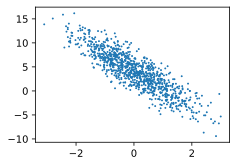

In [22]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),s=1);

# 2.Reading the Dataset&Split the Dataset into Minibatches

In [23]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [24]:
batch_size=10

for X,y in data_iter(batch_size,features,labels):
    print(X,"\n",y)
    break

tensor([[ 0.4238, -1.3730],
        [ 0.2590, -1.4803],
        [ 0.9215, -0.1936],
        [ 1.1934,  2.6573],
        [ 0.6713, -1.1173],
        [ 0.9749, -0.4369],
        [-0.3769,  0.3554],
        [ 0.0631, -0.4138],
        [-0.8086,  0.4980],
        [ 0.2358,  0.2442]]) 
 tensor([[ 9.7145],
        [ 9.7529],
        [ 6.6866],
        [-2.4474],
        [ 9.3455],
        [ 7.6496],
        [ 2.2318],
        [ 5.7375],
        [ 0.8816],
        [ 3.8254]])


# 3.Initializing Model Parameters

In [25]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# 4.Defining the Model

In [26]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

# 5.Defining the Loss Function

In [27]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 6.Deifning the Optimization Algorithm

In [29]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# 7.Training

In [44]:
lr=0.03
num_epochs=100
net=linreg
loss=squared_loss

In [45]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.000050
epoch 2,loss 0.000050
epoch 3,loss 0.000050
epoch 4,loss 0.000050
epoch 5,loss 0.000050
epoch 6,loss 0.000050
epoch 7,loss 0.000050
epoch 8,loss 0.000050
epoch 9,loss 0.000050
epoch 10,loss 0.000050
epoch 11,loss 0.000050
epoch 12,loss 0.000050
epoch 13,loss 0.000050
epoch 14,loss 0.000050
epoch 15,loss 0.000050
epoch 16,loss 0.000050
epoch 17,loss 0.000050
epoch 18,loss 0.000050
epoch 19,loss 0.000050
epoch 20,loss 0.000050
epoch 21,loss 0.000050
epoch 22,loss 0.000050
epoch 23,loss 0.000050
epoch 24,loss 0.000050
epoch 25,loss 0.000050
epoch 26,loss 0.000050
epoch 27,loss 0.000050
epoch 28,loss 0.000050
epoch 29,loss 0.000050
epoch 30,loss 0.000050
epoch 31,loss 0.000050
epoch 32,loss 0.000050
epoch 33,loss 0.000050
epoch 34,loss 0.000050
epoch 35,loss 0.000050
epoch 36,loss 0.000050
epoch 37,loss 0.000050
epoch 38,loss 0.000050
epoch 39,loss 0.000050
epoch 40,loss 0.000050
epoch 41,loss 0.000050
epoch 42,loss 0.000050
epoch 43,loss 0.000050
epoch 44,loss 0.0000

In [47]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b-b}')

error in estimating w: tensor([ 8.5831e-06, -1.3924e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0001], grad_fn=<RsubBackward1>)
